<a href="https://colab.research.google.com/github/anilans029/CNN/blob/main/4_variants_of_cnn_for_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,ReLU,Flatten,MaxPool2D
%matplotlib inline


***Loading the Mnist Dataset***

In [5]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()

print(f"the mnist data set having a training set of {x_train.shape[0]} samples,\n test set of {x_test.shape[0]} samples")

11501568/11490434 [==============================] - 0s 0us/step
the mnist data set having a training set of 60000 samples,
 test set of 10000 samples


***Visualize first few training data***

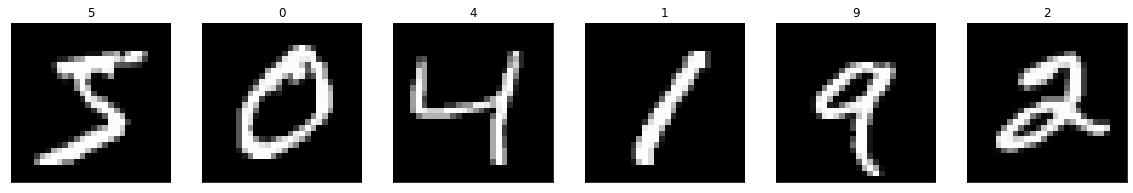

In [6]:

fig = plt.figure(figsize = (20,20))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(x_train[i],cmap = "gray")
  ax.set_title(str(y_train[i]))

***Pre-process the dataset***

In [7]:
### rescaling the images within the range 0 - 1 from 0,255

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [8]:
### encoding the categorical integer labels using one-hot encoding

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes=num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


***Reshaping our image data by adding the channel number too***

In [9]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)

x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

***Defining the model architecture***

In [10]:
model1 = Sequential()

## conv layer1
model1.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation = 'relu',input_shape = (28,28,1)))
## maxpool 1
model1.add(MaxPool2D(pool_size = (2,2)))
## conv layer2
model1.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))
## maxpool 2
model1.add(MaxPool2D(pool_size = (2,2)))
## conv layer3
model1.add(Conv2D(128,kernel_size=(3,3), activation = 'relu'))

model1.add(Flatten())
## adding dense layer with 64 neurons
model1.add(Dense(64,activation = "relu"))

model1.add(Dense(10,activation = "softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [11]:
model1.compile(loss= "categorical_crossentropy", optimizer= "rmsprop", metrics = ["accuracy"])

In [12]:
### train the model 

hist = model1.fit(x_train, y_train,batch_size = 32, epochs = 10, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1289 - accuracy: 0.9597 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0264 - val_accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.0354 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.0469 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0482 - val_accuracy

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_test[0].shape

(28, 28, 1)

In [15]:
model1.predict(x_test)[0]

array([6.58507732e-18, 7.75376977e-16, 8.30209602e-16, 1.14400295e-14,
       4.69188109e-15, 4.81341262e-17, 2.48732059e-21, 1.00000000e+00,
       1.53971029e-16, 2.14915515e-13], dtype=float32)

In [16]:
model2 = Sequential()

## conv layer1
model2.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation = 'tanh',input_shape = (28,28,1)))
## maxpool 1
model2.add(MaxPool2D(pool_size = (2,2)))
## conv layer2
model2.add(Conv2D(64,kernel_size=(3,3), activation = 'tanh'))
## maxpool 2
model2.add(MaxPool2D(pool_size = (2,2)))
## conv layer3
model2.add(Conv2D(128,kernel_size=(3,3), activation = 'relu'))

model2.add(Flatten())
## adding dense layer with 64 neurons
model2.add(Dense(64,activation = "tanh"))

model2.add(Dense(10,activation = "softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [17]:
model2.compile(loss= "categorical_crossentropy", optimizer= "rmsprop", metrics = ["accuracy"])

In [18]:
### train the model 

hist2 = model2.fit(x_train, y_train,batch_size = 32, epochs = 10, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1183 - accuracy: 0.9635 - val_loss: 0.0848 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0366 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9916 - val_loss: 0.0327 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.0326 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0288 - val_accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0465 - val_accuracy:

In [19]:
model3 = Sequential()

## conv layer1
model3.add(Conv2D(32,kernel_size=(7,7), padding = 'valid', activation = 'tanh',input_shape = (28,28,1)))
model3.add(Conv2D(64,kernel_size=(5,5), padding = 'valid', activation = 'tanh',input_shape = (28,28,1)))
## maxpool 1
model3.add(MaxPool2D(pool_size = (2,2)))
## conv layer2
model3.add(Conv2D(128,kernel_size=(5,5), activation = 'relu'))
## maxpool 2
model3.add(MaxPool2D(pool_size = (2,2)))


model3.add(Flatten())
## adding dense layer with 64 neurons
model3.add(Dense(64,activation = "tanh"))

model3.add(Dense(10,activation = "softmax"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 18, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)              

In [20]:
model3.compile(loss= "categorical_crossentropy", optimizer= "rmsprop", metrics = ["accuracy"])

In [21]:
### train the model 

hist3 = model3.fit(x_train, y_train,batch_size = 32, epochs = 10, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1500 - accuracy: 0.9539 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0476 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0486 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0410 - val_accuracy:

In [22]:
model4 = Sequential()

## conv layer1
model4.add(Conv2D(32,kernel_size=(7,7), padding = 'valid', activation = 'tanh',input_shape = (28,28,1)))
model4.add(Conv2D(64,kernel_size=(5,5), padding = 'valid', activation = 'tanh'))
model4.add(Conv2D(128,kernel_size=(3,3), padding = 'valid', activation = 'relu'))

## maxpool 1
model4.add(MaxPool2D(pool_size = (2,2)))
## conv layer2
model4.add(Conv2D(128,kernel_size=(3,3), activation = 'relu'))
  
## conv layer3
model4.add(Conv2D(128,kernel_size=(3,3), activation = 'relu'))

model4.add(Flatten())
## adding dense layer with 64 neurons
model4.add(Dense(64,activation = "tanh"))

model4.add(Dense(10,activation = "softmax"))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 conv2d_10 (Conv2D)          (None, 18, 18, 64)        51264     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 6, 6, 128)         147584    
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         147584    
                                                      

In [23]:
model4.compile(loss= "categorical_crossentropy", optimizer= "rmsprop", metrics = ["accuracy"])

In [24]:
### train the model 

hist4 = model4.fit(x_train, y_train,batch_size = 32, epochs = 10, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1802 - accuracy: 0.9447 - val_loss: 0.1381 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1369 - accuracy: 0.9591 - val_loss: 0.0982 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1468 - accuracy: 0.9556 - val_loss: 0.1055 - val_accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1493 - accuracy: 0.9546 - val_loss: 0.1800 - val_accuracy: 0.9414
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1402 - accuracy: 0.9575 - val_loss: 0.1905 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1365 - accuracy: 0.9602 - val_loss: 0.1023 - val_accuracy: 0.9693
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1272 - accuracy: 0.9627 - val_loss: 0.1280 - val_ac

In [25]:
hist1 = hist

Text(0.5, 1.0, 'val_accuracy of 4 models')

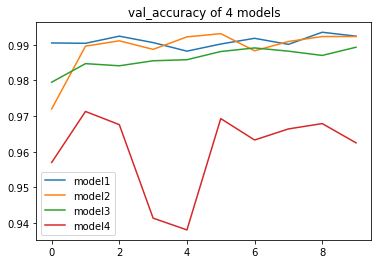

In [32]:
plt.plot(hist1.history["val_accuracy"],label='model1')
plt.plot(hist2.history["val_accuracy"],label='model2')
plt.plot(hist3.history["val_accuracy"],label='model3')
plt.plot(hist4.history["val_accuracy"],label='model4')
plt.legend()
plt.title("val_accuracy of 4 models")

Text(0.5, 1.0, 'val_loss of all the models')

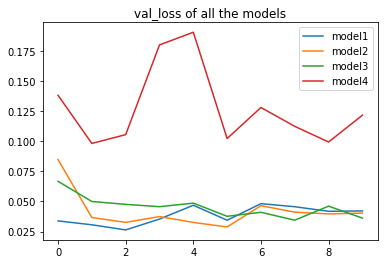

In [33]:
plt.plot(hist1.history["val_loss"],label='model1')
plt.plot(hist2.history["val_loss"],label='model2')
plt.plot(hist3.history["val_loss"],label='model3')
plt.plot(hist4.history["val_loss"],label='model4')
plt.legend()
plt.title("val_loss of all the models")